# Portifolio returns in python

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
tickers = ['JSLG3','PETR4','MGLU3','LREN3']
portifolio = pd.DataFrame()
for t in tickers:
    portifolio[t] = web.DataReader(t + '.SA',data_source='yahoo',start = '2015-1-1')['Adj Close']

In [8]:
portifolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1342 entries, 2015-01-02 to 2020-05-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JSLG3   1342 non-null   float64
 1   PETR4   1342 non-null   float64
 2   MGLU3   1342 non-null   float64
 3   LREN3   1342 non-null   float64
dtypes: float64(4)
memory usage: 52.4 KB


In [9]:
portifolio.head()

,JSLG3,PETR4,MGLU3,LREN3
Date,,,,
2015-01-02,10.376680,8.683469,0.442639,10.509092
2015-01-05,9.779160,7.941292,0.450958,10.216908
2015-01-06,9.434111,7.681531,0.445016,10.334602
2015-01-07,9.686585,8.043342,0.459870,10.510430
2015-01-08,9.711833,8.562866,0.456305,10.522914


In [10]:
portifolio.tail()

,JSLG3,PETR4,MGLU3,LREN3
Date,,,,
2020-05-25,18.750000,19.48,60.400002,40.369999
2020-05-26,19.709999,19.67,64.480003,38.150002
2020-05-27,20.930000,19.93,67.360001,39.790001
2020-05-28,20.200001,19.77,65.250000,39.029999
2020-05-29,20.340000,20.34,64.349998,38.549999


## Normalization to 100
$$
\frac{P_t}{P_0}*100
$$

In [11]:
portifolio.iloc[0]

JSLG3    10.376680
PETR4     8.683469
MGLU3     0.442639
LREN3    10.509092
Name: 2015-01-02 00:00:00, dtype: float64

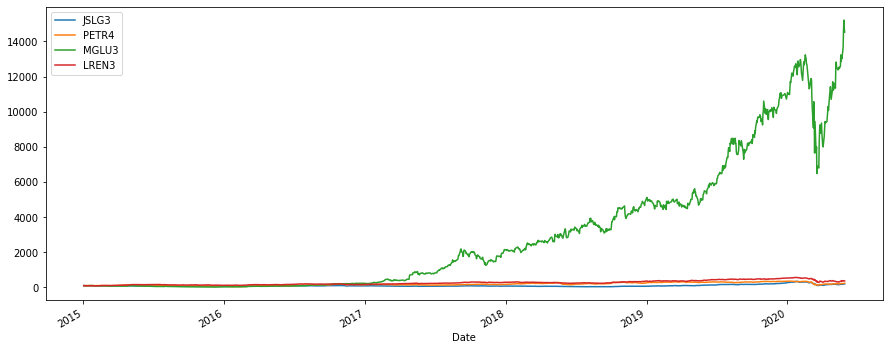

In [13]:
(portifolio/portifolio.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

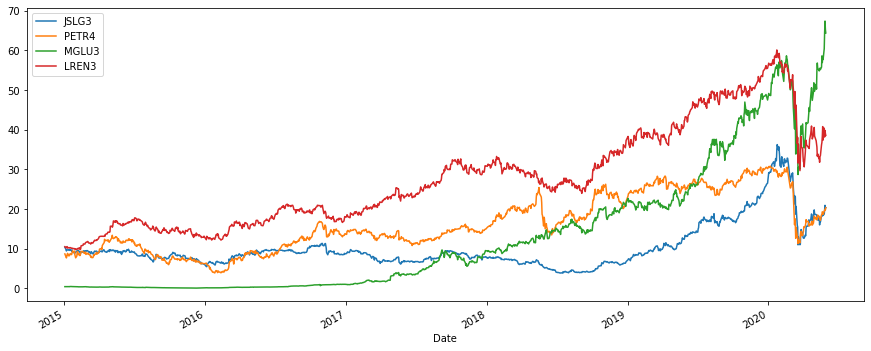

In [14]:
portifolio.plot(figsize=(15,6))

## Calculating the Return of a Portifolio

In [15]:
returns = (portifolio/portifolio.shift(1)) - 1
returns.head()

,JSLG3,PETR4,MGLU3,LREN3
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.057583,-0.085470,0.018792,-0.027803
2015-01-06,-0.035284,-0.032710,-0.013175,0.011520
2015-01-07,0.026762,0.047101,0.033378,0.017014
2015-01-08,0.002606,0.064591,-0.007752,0.001188


In [16]:
weights = np.array([0.25,0.25,0.25,0.25])

In [18]:
np.dot(returns,weights.reshape(4,1))

array([[        nan],
       [-0.03801602],
       [-0.0174125 ],
       ...,
       [ 0.04069221],
       [-0.0233327 ],
       [ 0.00241772]])

In [19]:
annual_returns = returns.mean() * 250
annual_returns

JSLG3    0.252748
PETR4    0.310607
MGLU3    1.174698
LREN3    0.315876
dtype: float64

In [24]:
portifolio_appreciation_1 = np.dot(annual_returns,weights)
portifolio_appreciation_1

0.5134821606926566

In [31]:
weights_2 = np.array([0,0.25,0.5,0.25])

In [32]:
portifolio_appreciation_2 = np.dot(annual_returns,weights_2)
portifolio_appreciation_2

0.7439697313120271